## Final Project Submission

Please fill out:
* Student name: Soudie Okwaro
* Student pace: part time
* Scheduled project review date/time: 
* Instructor name: Samuel Karu
* Blog post URL: https://github.com/MuiruriVivian/PHASE-2-GROUP-7-PROJECT


# Objective 2 Deep-dive
### To investigate whether user preferences have any bearing on Box Office Success;

#### Specifically analyze:
##### - User preference metrics relating to user feedback captured as votes or ratings
##### - How the user preference metrics correlate with each other and other aspects of Box Office budget
##### - Statistical distributions and inferential modelling to generate insights for investment decision making


In [68]:
# Import relevant Python libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import linregress
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")


Import the data files

In [69]:
# Import the data files
gross_budget_df = pd.read_csv('cleaned_gross_budget.csv')
merged_data_df = pd.read_csv('cleaned_merged_data.csv')

Merge Data files

In [70]:
# Merge the datasets on 'movie' and 'original_title', with 'cleaned_merged_data.csv' as the main table
df = pd.merge(merged_data_df, gross_budget_df, left_on='original_title', right_on='movie', how='left')

Calculate profitability

In [71]:
# Drop rows with missing values in production_budget or worldwide_gross
df = df.dropna(subset=['production_budget', 'worldwide_gross'])

# Calculate profitability
df['profitability'] = (df['worldwide_gross'] - df['production_budget']) / df['production_budget']

In [72]:
df.columns

Index(['original_language', 'original_title', 'popularity', 'release_date_x',
       'vote_average', 'vote_count', 'runtime_minutes', 'genres',
       'averagerating', 'numvotes', 'movie', 'studio', 'foreign_gross',
       'release_date_y', 'production_budget', 'domestic_gross',
       'worldwide_gross', 'profitability'],
      dtype='object')

Further Data cleaning

In [73]:
# Split the genre column into three parts: genre, genre_class, and genre_class_grouping
df[['genre', 'genre_class', 'genre_class_grouping']] = df['genres'].str.split(',', n=2, expand=True)

Removing outliers

In [74]:
# Use a function to remove outlier from multiple relevant columns using IQR method
def remove_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Remove outliers from specified columns
numeric_columns = ['averagerating', 'production_budget', 'worldwide_gross', 'runtime_minutes', 'profitability']
df_cleaned = remove_outliers(df, numeric_columns)

Exploratory Data Analysis (EDA)

Questions:

1. How does production budget impact a movie's box office revenue?

2. Is there a relationship between a movie's runtime and its user rating?

3. How does user engagement vary across different genres?


Relevant Data

To study how budget aspects affect user preferences and vice versa, use the following columns:


From the cleaned_gross_budget.csv dataset:



`genre`: The genre of the movie.

`production_budget`: The budget allocated for producing the movie.

`worldwide_gross`: The movie's worldwide box office revenue.


From the cleaned_merged_data.csv dataset:



`original_title`: The title of the movie.

`vote_average`: The average rating of the movie.

`vote_count`: The number of votes the movie received.

`runtime_minutes`: The movie's duration in minutes.



Focus on `vote_count` as the best measure of user engagement and `vote_average` as the best measure of user ratings.

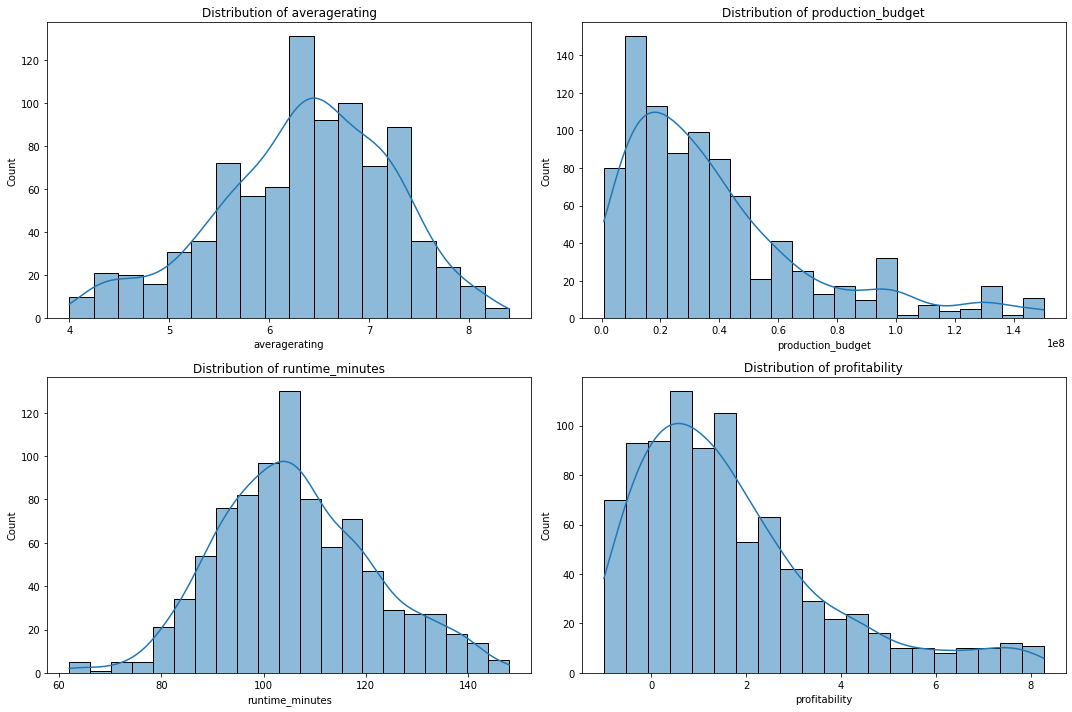

In [75]:
# Plot distributions
columns_to_plot = ['averagerating', 'production_budget', 'runtime_minutes', 'profitability']
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(columns_to_plot):
    sns.histplot(df_cleaned[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

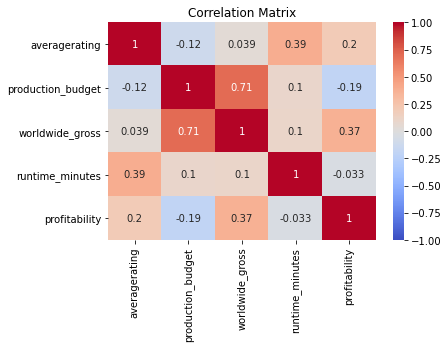

In [76]:
# Correlation matrix
corr_matrix = df_cleaned[['averagerating', 'production_budget', 'worldwide_gross','runtime_minutes', 'profitability']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

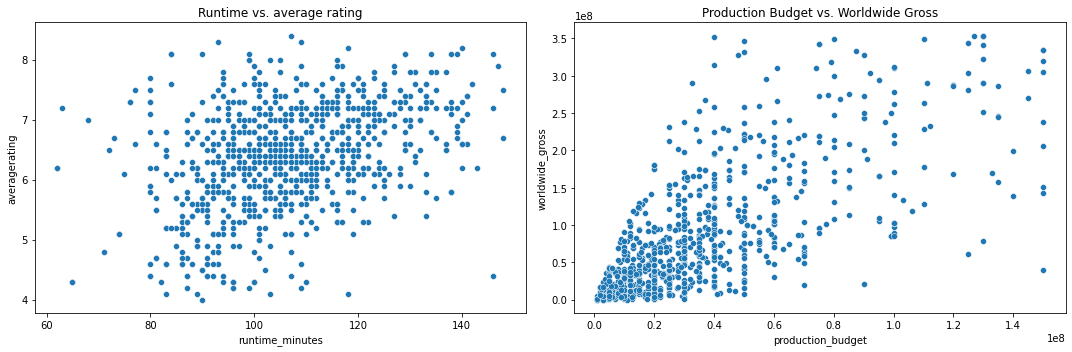

In [77]:
# Scatter plots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# runtime vs vote_average
sns.scatterplot(data=df_cleaned, x='runtime_minutes', y='averagerating', ax=axes[0])
axes[0].set_title('Runtime vs. average rating')

# production_budget vs worldwide_gross
sns.scatterplot(data=df_cleaned, x='production_budget', y='worldwide_gross', ax=axes[1])
axes[1].set_title('Production Budget vs. Worldwide Gross')

plt.tight_layout()
plt.show()

Inferential Modeling

In [86]:

# Regress 'production_budget' against 'worldwide_gross'

# Prepare data for regression
X = df_cleaned['production_budget'].values  # Independent variable
y = df_cleaned['worldwide_gross'].values    # Dependent variable

# Perform linear regression using scipy's linregress
slope, intercept, r_value, p_value, std_err = linregress(X, y)

# Calculate R-squared from r_value
r_squared = r_value**2

# Output the results
print(f'R-squared: {r_squared}')
print(f'Coefficient (Slope): {slope}, Intercept: {intercept}')

R-squared: 0.5016175282726171
Coefficient (Slope): 1.846473685817386, Intercept: 19705776.463316783


Perform normality test using only the Jarque-Bera Test

>> Jarque-Bera test for averagerating: Statistic=22.8633012806403, p-value=1.0846689493693162e-05
averagerating is likely not normally distributed (reject H0 at alpha=0.05).


<Figure size 432x432 with 0 Axes>

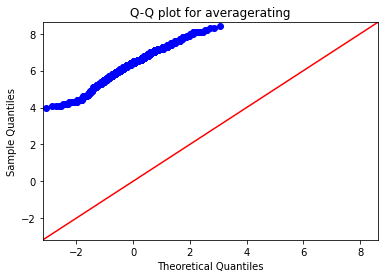

>> Jarque-Bera test for production_budget: Statistic=436.334198756314, p-value=0.0
production_budget is likely not normally distributed (reject H0 at alpha=0.05).


<Figure size 432x432 with 0 Axes>

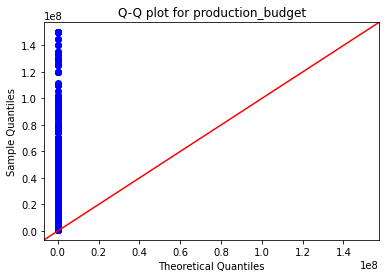

>> Jarque-Bera test for runtime_minutes: Statistic=9.798786210128625, p-value=0.0074511037361238985
runtime_minutes is likely not normally distributed (reject H0 at alpha=0.05).


<Figure size 432x432 with 0 Axes>

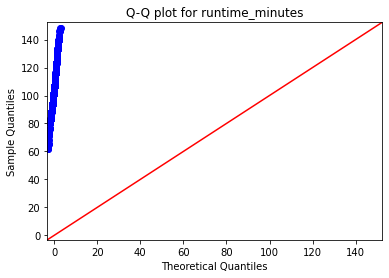

>> Jarque-Bera test for profitability: Statistic=288.4949504179214, p-value=0.0
profitability is likely not normally distributed (reject H0 at alpha=0.05).


<Figure size 432x432 with 0 Axes>

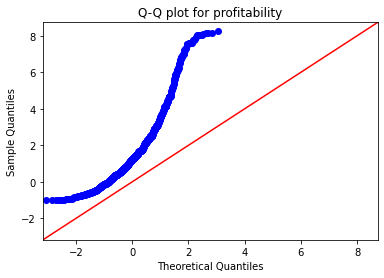

In [79]:
# List of columns to test for normality
columns_to_test = ['averagerating', 'production_budget', 'runtime_minutes', 'profitability']

# Testing for normality using the Jarque-Bera test
for col in columns_to_test:
    # Drop NaN values for the column
    data = df_cleaned[col].dropna()
    
    # Jarque-Bera Test
    jarque_bera_stat, jarque_bera_p_value = stats.jarque_bera(data)
    print(f'>> Jarque-Bera test for {col}: Statistic={jarque_bera_stat}, p-value={jarque_bera_p_value}')
    
    # Interpretation
    if jarque_bera_p_value < 0.05:
        print(f"{col} is likely not normally distributed (reject H0 at alpha=0.05).")
    else:
        print(f"{col} is likely normally distributed (fail to reject H0 at alpha=0.05).")
    
    # Visual Check: Q-Q Plot
    plt.figure(figsize=(6,6))
    sm.qqplot(data, line ='45')  # 45-degree reference line
    plt.title(f'Q-Q plot for {col}')
    plt.show()

Normalize the columns using Log Transformations

In [80]:
# Assuming df_cleaned is your dataframe and columns to be normalized are mentioned
columns_to_transform = ['averagerating', 'production_budget', 'runtime_minutes', 'profitability']

# Define a function to apply Box-Cox (for positive values) or Yeo-Johnson (for mixed values)
def normalize_data(df, columns):
    normalized_data = pd.DataFrame()

    for col in columns:
        # Check if the column contains negative or zero values
        if (df[col] <= 0).any():
            # Use Yeo-Johnson transformation if there are non-positive values
            normalized_data[col], _ = stats.yeojohnson(df[col].dropna())
        else:
            # Use Box-Cox transformation for positive values
            normalized_data[col], _ = stats.boxcox(df[col].dropna())

    return normalized_data

# Apply the transformation
normalized_df = normalize_data(df_cleaned, columns_to_transform)

# Print out the first few rows of the transformed data
print(normalized_df.head())

# Now, check normality of transformed data using Jarque-Bera or Shapiro-Wilk
from scipy.stats import jarque_bera, shapiro

for col in normalized_df.columns:
    jb_stat, jb_p_value = jarque_bera(normalized_df[col].dropna())
    print(f'Jarque-Bera test for {col}: Statistic={jb_stat}, p-value={jb_p_value}')
    if jb_p_value < 0.05:
        print(f"{col} is likely not normally distributed (reject H0 at alpha=0.05).")
    else:
        print(f"{col} is likely normally distributed (fail to reject H0 at alpha=0.05).")

   averagerating  production_budget  runtime_minutes  profitability
0      25.268007         311.084811        12.917739       1.028524
1      19.981690         279.478539        13.423489       1.399121
2      14.751870         193.566407        12.588526       2.768284
3      22.549949         277.877292        14.311593       0.753492
4      31.152773         277.877292        15.395865       1.588635
Jarque-Bera test for averagerating: Statistic=4.589691087712394, p-value=0.10077695768653117
averagerating is likely normally distributed (fail to reject H0 at alpha=0.05).
Jarque-Bera test for production_budget: Statistic=3.1999032233314666, p-value=0.20190628766722263
production_budget is likely normally distributed (fail to reject H0 at alpha=0.05).
Jarque-Bera test for runtime_minutes: Statistic=0.0013856574827007357, p-value=0.999307411209064
runtime_minutes is likely normally distributed (fail to reject H0 at alpha=0.05).
Jarque-Bera test for profitability: Statistic=6.5554344903

Focus on the normally distributed columns for hypothesis testing

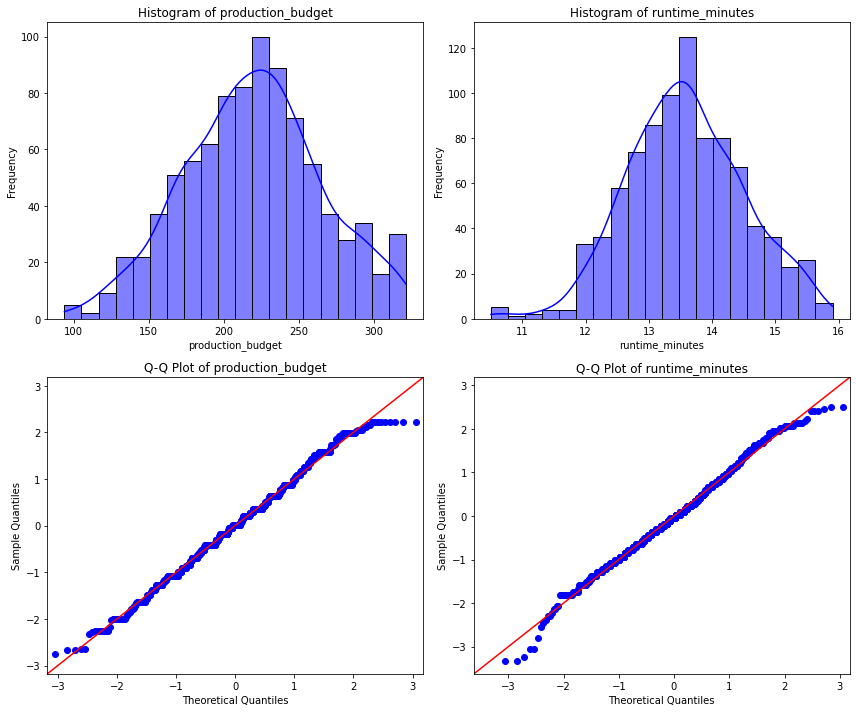

In [ ]:
# Display the distributions in the normally distributed columns
# Select the columns that are likely normally distributed
normal_columns = ['production_budget', 'runtime_minutes']

# Set up plot layout
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,10))

# Plot histograms
for i, col in enumerate(normal_columns):
    # Histogram
    sns.histplot(normalized_df[col], bins=20, kde=True, color="blue", ax=axes[0, i])
    axes[0, i].set_title(f"Histogram of {col}")
    axes[0, i].set_xlabel(col)
    axes[0, i].set_ylabel("Frequency")

    # Q-Q Plot
    sm.graphics.qqplot(normalized_df[col], dist=stats.norm, line='45', fit=True, ax=axes[1, i])
    axes[1, i].set_title(f"Q-Q Plot of {col}")
    axes[1, i].set_xlabel("Theoretical Quantiles")
    axes[1, i].set_ylabel("Sample Quantiles")

# Adjust layout
fig.tight_layout()
plt.show()

In [82]:
#Hypothesis  Testing: Test if movie runtimes affect Production budget using a t-test.
# Split data by median runtime
median_runtime = df_cleaned['runtime_minutes'].median()
group1 = df_cleaned[df_cleaned['runtime_minutes'] <= median_runtime]['production_budget']
group2 = df_cleaned[df_cleaned['runtime_minutes'] > median_runtime]['production_budget']

# Perform t-test
t_stat, p_val = stats.ttest_ind(group1, group2)
print(f'T-test Statistic: {t_stat}, P-value: {p_val}')

T-test Statistic: -1.122520726263608, P-value: 0.26194554056133906


In [83]:
#ANOVA: Perform ANOVA on vote_count by genre
anova_result = stats.f_oneway(*(df_cleaned[df_cleaned['genre'] == genre]['runtime_minutes'] for genre in df_cleaned['genre'].unique()))
print(f'ANOVA F-statistic: {anova_result.statistic}, P-value: {anova_result.pvalue}')

ANOVA F-statistic: 19.171540188815246, P-value: 2.5371012889404967e-37


In [84]:
#ANOVA: Perform ANOVA on vote_count by genre
anova_result = stats.f_oneway(*(df_cleaned[df_cleaned['genre'] == genre]['production_budget'] for genre in df_cleaned['genre'].unique()))
print(f'ANOVA F-statistic: {anova_result.statistic}, P-value: {anova_result.pvalue}')

ANOVA F-statistic: 17.593507424618867, P-value: 3.471408531846707e-34


# Comments


### EDA


#### 1. Distribution Analysis: 


##### - The data appears to be normally distributed for `average rating`, `production budget`, and `profitability`, while `runtime minutes` are skewed right, with most movies falling between 90 and 120 minutes.

#### 2. Correlation Analysis: 

##### - The correlation matrix shows a strong positive relationship between `production budget` and `worldwide gross`, while `profitability` is moderately positively correlated with `worldwide gross` and `average rating`, and there are weak to no correlations between the remaining variables.


### 3. Scatter Plot Analysis: 


##### - The scatter plots show a weak positive relationship between `runtime_minutes` and `averagerating`, indicating that movie runtime has little effect on user ratings, while `production_budget` and `worldwide_gross` exhibit a more noticeable positive trend, suggesting that higher budgets tend to correspond with higher box office revenues.


### STATISTICAL DISTRIBUTIONS

#### 1. Normality Tests: Perform normality test using only the Jarque-Bera Test

##### - Only `production_budget` and `runtime_minutes` were normally distributed after normalization using Log Transformation.


### INFERENTIAL MODELING

#### 1. Regression Analysis

##### - R-squared of 0.50, indicates that production budget explains 50% of the variance in worldwide gross, with a coefficient (slope) of 1.85 and an intercept of 19,705,776

#### 2. Hypothesis Testing: 
##### a) t-test to determine if there's a significant difference in production budgets between movies with runtimes above and below the median runtime. The output shows a t-statistic of 1.12 and a p-value of 0.26. Since the p-value is greater than the common significance level of 0.05, we fail to reject the null hypothesis. This means there's no statistically significant evidence to suggest that runtime affects production budget.   

##### b) ANOVA Test: ANOVA analysis reveals that movie genre significantly influences both runtime and production budget.

# Conclusion

### While production budget is a significant predictor of worldwide gross and genre influences both runtime and production budget, runtime itself has no significant impact on production budget or average rating.

# Recommendations



##### 1. Invest in films with higher production budgets: As there's a strong positive correlation between production budget and worldwide gross, allocating more funds to film production can potentially increase box-office revenue.  This suggests that well-resourced films tend to perform better financially.

##### 2. Focus on genre-specific strategies: Since genre significantly influences both runtime and production budget, develop targeted strategies for different genres. Consider tailoring film length and budget allocation based on the specific genre to optimize audience appeal and resource utilization. For example, action movies might have longer runtimes and higher budgets compared to comedies.

##### 3. Don't prioritize runtime to improve ratings:  The analysis shows no significant relationship between runtime and average rating. Therefore, focus on other factors like storytelling, directing, and acting to improve movie ratings rather than manipulating the film's length.